### import libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset 
from torchvision import transforms

In [2]:
class SignLanguageDataset(Dataset):

    def __init__(self, images, labels=None, transform=None):
        """
        Args:
            images (string): Path to the csv file with annotations.
            labels (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        
        #if torch.is_tensor(idx):
        #    idx = idx.tolist()
        
        x = self.images[index, :]
        x = x.reshape(28, 28, 1)
        if self.transform:
            x = self.transform(x)
        
        y = self.labels[index]

        if self.labels is not None:
            return(x, y)
        else:
            return x

### read data from csv files

In [3]:
train_path = "data/sign_mnist_train.csv"
test_path = "data/sign_mnist_test.csv"

train_pd = pd.read_csv(train_path)
test_pd = pd.read_csv(test_path)

print('train data type      :', type(train_pd))
print("train data shape     :", train_pd.shape)
print("----------------------------------------------------------")
print('test  data type      :', type(test_pd))
print("test  data shape     :", test_pd.shape)
print("----------------------------------------------------------")
print("Display first 5 rows of train dataset:")
display(train_pd.head())

train data type      : <class 'pandas.core.frame.DataFrame'>
train data shape     : (27455, 785)
----------------------------------------------------------
test  data type      : <class 'pandas.core.frame.DataFrame'>
test  data shape     : (7172, 785)
----------------------------------------------------------
Display first 5 rows of train dataset:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Convert data to numpy

In [4]:
data_np = np.array(train_pd, dtype=np.float32)
m, n = data_np.shape
print('no. of examples:', m)
print('no. of features:', n)

# shuffle the data
#np.random.shuffle(data_np)

no. of examples: 27455
no. of features: 785


### split data to images and labels

In [5]:
labels_np = data_np[:, 0]
images_np = data_np[:, 1:n]
images_np = images_np / 255.

print('images.shape      :', images_np.shape)
print('labels.shape      :', labels_np.shape)

images.shape      : (27455, 784)
labels.shape      : (27455,)


### data augmentation

In [6]:
if (images_np.shape[0]==labels_np.shape[0]):
    print('images and labels have same number of rows')

my_transforms = transforms.Compose([
    transforms.ToPILImage(mode='F'), 
    transforms.Resize((32,32)), 
    transforms.RandomCrop((28,28)), 
    #transforms.ColorJitter(brightness=0.5), 
    transforms.RandomRotation(degrees=45), 
    transforms.RandomHorizontalFlip(p=0.5), 
    #transforms.RandomVerticalFlip(p=0.05), 
    #transforms.RandomGrayscale(p=0.2), 
    transforms.ToTensor(), 
    #transforms.Normalize(mean=0.5, std=0.5), # (value - mean) / std
])

data = SignLanguageDataset(images_np, labels_np, transform=my_transforms)
#print(type(data))
#print(data[2][0].shape)

images and labels have same number of rows


### data summary

In [21]:
print('for index, (images, labels) in enumerate(data):')
for index, (images, labels) in enumerate(data):
    print('    index        : index of the row')
    print('    images.shape :', images.shape)
    print('    type(labels) :', type(labels))
    break

for index, (images, labels) in enumerate(data):
    index        : index of the row
    images.shape : torch.Size([1, 28, 28])
    type(labels) : <class 'numpy.float32'>


### create batches

In [19]:
train_loader = torch.utils.data.DataLoader(dataset=data, batch_size=64, shuffle=True)

single_batch = iter(train_loader)
images, labels = single_batch.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


### data balance check

unique labels values:
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]
no. of unique values: 24


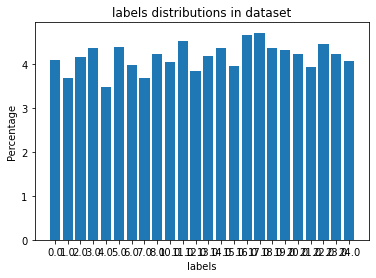

In [30]:
print("unique labels values:\n", np.unique(labels_np))
print('no. of unique values:', len(np.unique(labels_np)))

total = len(labels_np)
counter_dict = {}
for num in np.unique(labels_np):
    counter_dict[num] = (len(labels_np[labels_np==num])/total)*100

names = list(counter_dict.keys())
values = list(counter_dict.values())
plt.bar(range(len(counter_dict)), values, tick_label=names)
plt.title("labels distributions in dataset")
plt.xlabel("labels")
plt.ylabel("Percentage")
plt.show()

### Plot Some Examples

Label: 20


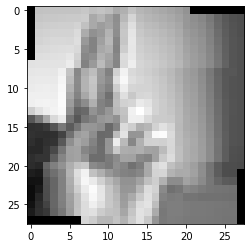

In [98]:
idx = 796
image, label = data[idx]
#plt.gray()
plt.imshow(image.reshape((28,28)), interpolation='nearest')
plt.show
print("Label:", int(label.item()))

### Store Variables to use in another notebook

In [37]:
# store variables to use in another notebook
#x = images
#y = labels
%store data
del data

Proper storage of interactively declared classes (or instances
of those classes) is not possible! Only instances
of classes in real modules on file system can be %store'd.



# STORAGE

In [11]:
'''
# reshape each row  (784,) ---> (1, 28, 28)
images_np_reshaped = images_np.reshape(-1, 1, 28,28)
print(type(images_np_reshaped))
print(images_np_reshaped.shape)
print(images_np_reshaped[1,:,:,:].shape)

images = torch.from_numpy(images_np_reshaped)
labels = torch.from_numpy(labels_np)
print('images type  :', type(images))
print('images shape :', images.shape)
print("----------------------------------------------------------")
print('labels types :', type(labels))
print('labels shape :', labels.shape)
'''

'\n# reshape each row  (784,) ---> (1, 28, 28)\nimages_np_reshaped = images_np.reshape(-1, 1, 28,28)\nprint(type(images_np_reshaped))\nprint(images_np_reshaped.shape)\nprint(images_np_reshaped[1,:,:,:].shape)\n'